<a href="https://colab.research.google.com/github/Archana0002/MCAS3/blob/main/kmeans_iriss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
df=pd.read_csv('/content/iris (2).csv')

In [ ]:
x = df.drop('variety',axis=1)
y = df['variety']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)


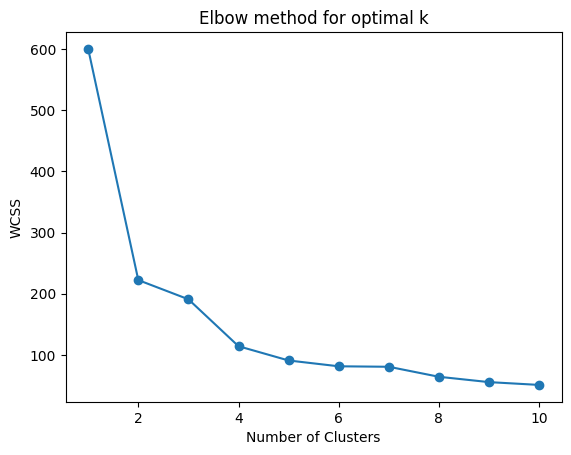

In [ ]:
plt.plot(range(1,11),wcss,marker='o',linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow method for optimal k')
plt.show()

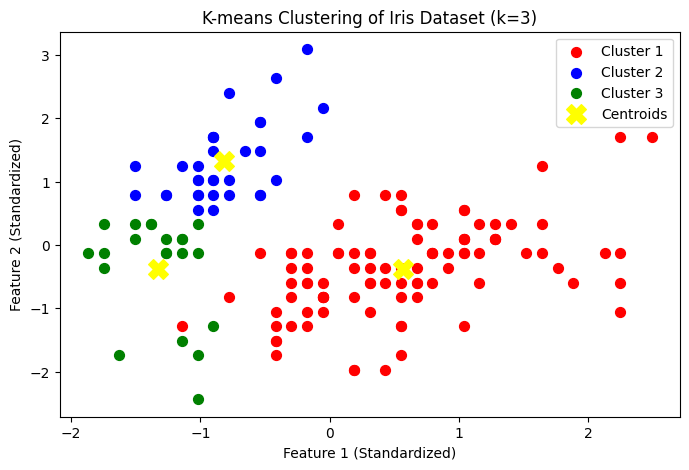

In [ ]:
# Apply K-means with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(x_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 5))

# We will plot using the first two features (sepal length and sepal width)
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')

plt.title("K-means Clustering of Iris Dataset (k=3)")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend()
plt.show()